<a href="https://colab.research.google.com/github/Charan6924/MachineLearningProjects/blob/main/TrainingModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.preprocessing import add_dummy_feature
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m,1)
y = 4 + 3 * X + np.random.rand(m,1)

In [3]:
X_b = add_dummy_feature(X)
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [4]:
print(theta)
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta
y_predict

[[4.51359766]
 [2.98323418]]


array([[ 4.51359766],
       [10.48006601]])

Gradient Descent

In [5]:
eta = 0.1
n = 1000
m = len(X_b)

Batch Gradient Descent

In [6]:
np.random.seed(42)
theta = np.random.randn(2,1)
for i in range(n):
  gradients = 2/m * X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradients

In [7]:
theta

array([[4.51359766],
       [2.98323418]])

Stochastic Gradient Descent

In [8]:
n = 50
t0,t1 = 5,50

def learning_schedule(t):
  return t0/(t + t1)

np.random.seed(42)
theta = np.random.randn(2,1)

for i in range(n):
  for j in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index + 1]
    gradients = 2 * xi.T @ (xi @ theta - yi)
    theta = theta - eta * gradients

In [9]:
theta

array([[4.47461794],
       [2.84977696]])

In [10]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter = 1000,tol = 1e-5, penalty = None, eta0 = 0.01, n_iter_no_change=100,random_state = 42)
sgd.fit(X,y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [11]:
sgd.intercept_

array([4.50316965])

In [12]:
sgd.coef_

array([2.99156535])

Polynomial Regression

In [13]:
np.random.seed(42)
m = 100
X = 6 * np.random.randn(m,1) - 3
y = 0.5 * X ** 2 + X + 2 +np.random.randn(m,1)

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.01971508])

In [15]:
X_poly[0]

array([-0.01971508,  0.00038868])

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_


array([1.87009469])

In [18]:
lin_reg.coef_

array([[1.01811444, 0.50512305]])

In [19]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(),X, y, train_sizes = np.linspace(0.01,1.0,40), cv = 5, scoring = 'neg_root_mean_squared_error'
)
train_errors = train_scores.mean(axis = 1)
valid_errors = valid_scores.mean(axis = 1)

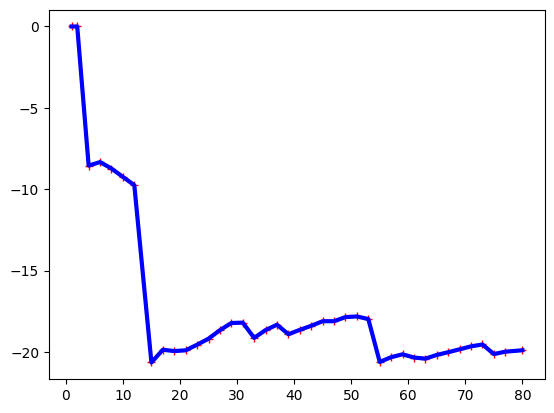

In [20]:
plt.plot(train_sizes, train_errors, 'r-+',linewidth = 2, label = 'train')
plt.plot(train_sizes, train_errors, 'b-', linewidth = 3, label = 'valid')
plt.show()

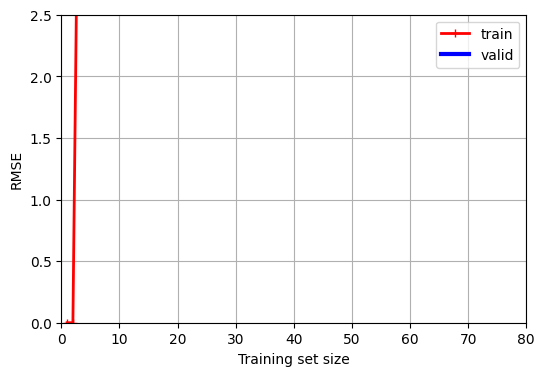

In [21]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])

plt.show()

Ridge Regression

In [22]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1,solver = 'cholesky')
ridge.fit(X,y)
ridge.predict([[1.5]])

array([3.66585975])

In [23]:
sgd = SGDRegressor(penalty = 'l2',alpha = 0.1/m,tol = None, max_iter = 1000, eta0 = 0.01, random_state = 42)
sgd.fit(X,y.ravel())
sgd.predict([[1.5]])


array([4.08748715])

Early Stopping

In [24]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree = 90, include_bias = False), StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.fit_transform(X_valid)
sgd_reg = SGDRegressor(penalty = None, eta0 = 0.002, random_state = 42)
n = 500
best_valid_rmse = float('inf')

for i in range(n):
  sgd_reg.partial_fit(X_train_prep, y_train)
  y_valid_predict = sgd_reg.predict(X_valid_prep)
  val_error = mean_squared_error(y_valid,y_valid_predict)
  if val_error < best_valid_rmse:
    best_valid_rmse = val_error
    best_model = deepcopy(sgd_reg)

In [25]:
best_model

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

Decision Boundaries

In [26]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame = True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [28]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
iris.target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [30]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[['petal width (cm)']]
y = iris.target_names[iris.target] == 'virginica'

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [32]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:,1] >= 0.5][0,0]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


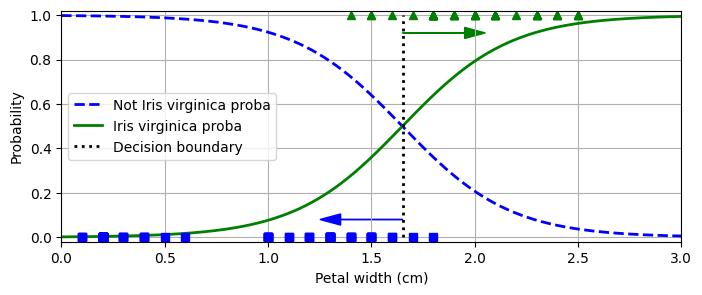

In [34]:
plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()

In [35]:
decision_boundary

np.float64(1.6516516516516517)

In [36]:
log_reg.predict([[1.7],[1.5]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True, False])

In [39]:
X = iris.data[['petal length (cm)','petal width (cm)']].values
y = iris['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)
softmax = LogisticRegression(C = 30, random_state = 42)
softmax.fit(X_train,y_train)

LogisticRegression(C=30, random_state=42)

In [40]:
softmax.predict([[5,2]])

array([2])

In [42]:
softmax.predict_proba([[5,2]]).round(2)

array([[0.  , 0.04, 0.96]])